# MIE451/1513 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

ii. what preprocessing steps you implemented


- Location I selected is St. Catherine.
- Preprocessing steps as follow:





In [438]:
import sys
print(sys.version)
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [439]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [440]:
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('reviews1.csv', header = None, names = columnNames)


In [441]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data/ca/155013/188279/375915363.html,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,"""We have stayed here before and always booked an accessible King-bed room on the ground floor, which is convenient for our service dog and for access to the vehicle. As always, I called a few days ahead of arrival to ensure the hotel was aware of the dog (as noted on the reservation form) and to request the ground floor king room we have grown accustomed to. It is important to me to try to make everything as copasetic as possible, keeping travel stress levels to a minimum. I was assured we ...",2,negative,2016-05-23,327 Ontario St,St. Catharines,Ontario,L2R 5L3
1,data/ca/155013/188279/504336550.html,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,"""I have a few expectations of hotels-they have to be clean and staff has to be helpful. The room here was run down with a heavy carpet and dingy bedding. The bathroom was clean. \n\nThe staff are less than helpful. When asked where to park, they said anywhere but bank parking. Wellll...the parking lot is definitely not big enough for the number of guests. On the third or fourth night when I couldn't find a spot I called the front desk from the parking lot and was told there are spaces behind...",2,negative,2017-07-21,327 Ontario St,St. Catharines,Ontario,L2R 5L3
2,data/ca/155013/188279/681535571.html,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,"""This hotel was great! The housekeeping staff were professional and did a good job. \n\nFront desk staff were friendly as well. There was an issue with my card upon check in but they fixed it immediately. \n\nThe only downfall was that the sana wasn\u2019t working and the hot tub was not hot. \n\nWe travel a lot for hockey and this hotel was one of the best.",4,positive,2019-06-14,327 Ontario St,St. Catharines,Ontario,L2R 5L3
3,data/ca/155013/188279/504816427.html,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,"""I am a Gold Elite IHG member and stay frequently in Holiday Inn for business. This location is by far the poorest quality yet. The rooms and hallways smelled of mold and mildew and the door to the room was damaged. The price is also the most expensive for what we received. No breakfast in the morning. The front desk staff were very pleasant. Also the elevator location and size for this hotel is very inadequate. Lots of waiting and had to take the stairs. Thanks",2,negative,2017-07-23,327 Ontario St,St. Catharines,Ontario,L2R 5L3
4,data/ca/155013/188279/294559573.html,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,"""Stayed 3 nights with family in one bedroom suite on 9th floor. I booked this hotel since $150 CAD a night was a fair price for one-bedroom suite in this area in the middle of summer. \n \nPositives: \nThe staff that I dealt with were mostly nice. Wifi and Parking are free. The sheets and towels were clean. I asked to waive the voluntary 'Destination Marketing Fee' (5%) upon arrival. The lady said to ask it upon departure. I did just that and another lady said \""sorry, you've been charged up...",2,negative,2015-07-31,327 Ontario St,St. Catharines,Ontario,L2R 5L3


In [442]:
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [443]:
reviews = hotelDf['reviewColumn'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 1427/1427 [00:01<00:00, 770.94it/s]


In [444]:
reviewDF[:5]

,reviewCol,vader
0,"""We have stayed here before and always booked an accessible King-bed room on the ground floor, which is convenient for our service dog and for access to the vehicle. As always, I called a few days ahead of arrival to ensure the hotel was aware of the dog (as noted on the reservation form) and to request the ground floor king room we have grown accustomed to. It is important to me to try to make everything as copasetic as possible, keeping travel stress levels to a minimum. I was assured we ...",-0.9195
1,"""I have a few expectations of hotels-they have to be clean and staff has to be helpful. The room here was run down with a heavy carpet and dingy bedding. The bathroom was clean. \n\nThe staff are less than helpful. When asked where to park, they said anywhere but bank parking. Wellll...the parking lot is definitely not big enough for the number of guests. On the third or fourth night when I couldn't find a spot I called the front desk from the parking lot and was told there are spaces behind...",-0.9722
2,"""This hotel was great! The housekeeping staff were professional and did a good job. \n\nFront desk staff were friendly as well. There was an issue with my card upon check in but they fixed it immediately. \n\nThe only downfall was that the sana wasn\u2019t working and the hot tub was not hot. \n\nWe travel a lot for hockey and this hotel was one of the best.",0.9223
3,"""I am a Gold Elite IHG member and stay frequently in Holiday Inn for business. This location is by far the poorest quality yet. The rooms and hallways smelled of mold and mildew and the door to the room was damaged. The price is also the most expensive for what we received. No breakfast in the morning. The front desk staff were very pleasant. Also the elevator location and size for this hotel is very inadequate. Lots of waiting and had to take the stairs. Thanks",-0.3400
4,"""Stayed 3 nights with family in one bedroom suite on 9th floor. I booked this hotel since $150 CAD a night was a fair price for one-bedroom suite in this area in the middle of summer. \n \nPositives: \nThe staff that I dealt with were mostly nice. Wifi and Parking are free. The sheets and towels were clean. I asked to waive the voluntary 'Destination Marketing Fee' (5%) upon arrival. The lady said to ask it upon departure. I did just that and another lady said \""sorry, you've been charged up...",-0.6325


In [445]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('stayed')
    stop.add('staff')
    stop.add('catharines')
    stop.add('catharine')
    stop.add('catherines')
    stop.add('catherine')
    stop.add('niagara')
    stop.add('falls')
    stop.add('inn')
    stop.add('hotels')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [446]:
topk = getTopKWords(reviewDF, 50)
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)

In [447]:
topk

[('clean', 795),
 ('great', 686),
 ('breakfast', 638),
 ('would', 588),
 ('good', 549),
 ('nice', 495),
 ('comfortable', 451),
 ('one', 439),
 ('well', 426),
 ('area', 400),
 ('friendly', 388),
 ('place', 387),
 ('night', 383),
 ('bed', 322),
 ('pool', 312),
 ('back', 305),
 ('location', 305),
 ('also', 303),
 ('time', 296),
 ('desk', 292),
 ('front', 275),
 ('nthe', 275),
 ('get', 263),
 ('restaurant', 261),
 ('could', 256),
 ('close', 251),
 ('recommend', 247),
 ('like', 246),
 ('helpful', 237),
 ('service', 227),
 ('quiet', 225),
 ('bathroom', 218),
 ('next', 213),
 ('suite', 210),
 ('even', 209),
 ('really', 208),
 ('right', 203),
 ('day', 200),
 ('best', 197),
 ('made', 195),
 ('coffee', 194),
 ('two', 191),
 ('door', 187),
 ('hot', 183),
 ('beds', 178),
 ('price', 174),
 ('everything', 173),
 ('food', 173),
 ('floor', 171),
 ('check', 170)]

In [448]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,clean,great,breakfast,would,good,nice,comfortable,one,well,area,friendly,place,night,bed,pool,back,location,also,time,desk,front,nthe,get,restaurant,could,close,recommend,like,helpful,service,quiet,bathroom,next,suite,even,really,right,day,best,made,coffee,two,door,hot,beds,price,everything,food,floor,check
0,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,2,negative,"""We have stayed here before and always booked an accessible King-bed room on the ground floor, which is convenient for our service dog and for access to the vehicle. As always, I called a few days ahead of arrival to ensure the hotel was aware of the dog (as noted on the reservation form) and to request the ground floor king room we have grown accustomed to. It is important to me to try to make everything as copasetic as possible, keeping travel stress levels to a minimum. I was assured we ...",-0.9195,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1
1,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,2,negative,"""I have a few expectations of hotels-they have to be clean and staff has to be helpful. The room here was run down with a heavy carpet and dingy bedding. The bathroom was clean. \n\nThe staff are less than helpful. When asked where to park, they said anywhere but bank parking. Wellll...the parking lot is definitely not big enough for the number of guests. On the third or fourth night when I couldn't find a spot I called the front desk from the parking lot and was told there are spaces behind...",-0.9722,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0
2,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,4,positive,"""This hotel was great! The housekeeping staff were professional and did a good job. \n\nFront desk staff were friendly as well. There was an issue with my card upon check in but they fixed it immediately. \n\nThe only downfall was that the sana wasn\u2019t working and the hot tub was not hot. \n\nWe travel a lot for hockey and this hotel was one of the best.",0.9223,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,2,negative,"""I am a Gold Elite IHG member and stay frequently in Holiday Inn for business. This location is by far the poorest quality yet. The rooms and hallways smelled of mold and mildew and the door to the room was damaged. The price is also the most expensive for what we received. No breakfast in the morning. The front desk staff were very pleasant. Also the elevator location and size for this hotel is very inadequate. Lots of waiting and had to take the stairs. Thanks",-0.3400,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,2,negative,"""Stayed 3 nights with family in one bedroom suite on 9th floor. I booked this hotel since $150 CAD a night was a fair price for one-bedroom suite in this area in the middle of summer. \n \nPositives: \nThe staff that I dealt with were mostly nice. Wifi and Parking are free. The sheets and towels were clean. I asked to waive the voluntary 'Destination Marketing Fee' (5%) upon arrival. The lady said to ask it upon departure. I did just that and another lady said \""sorry, you've been charged up...",-0.6325,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0


# Q1

In [449]:
hotelNames = finaldf['hotelName'].unique()
len(hotelNames)

15

In [450]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels, you may need to provide additional filtering
  tempDf = df[['hotelName','vader','ratingScore','reviewCol']]
  tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [451]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df


,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
Best Western St. Catharines Hotel &amp; Conference Centre,0.736876,3.812689,331
Canadas Best Value Inn - St. Catharines,0.621343,3.400000,115
Capri Inn,0.881913,4.588235,255
Cedar Suite Bed &amp; Breakfast,0.965985,4.896226,106
Christine&#39;s Bed and Breakfast,0.970239,4.888889,18
Comfort Inn,0.651265,3.640000,75
Hampton Inn St Catharines Niagara,0.830222,4.244444,45
Harbour Heights Bed &amp; Breakfast,0.956088,5.000000,8
Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,0.663850,3.789744,195


In [452]:
avgRatingTop5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore','n_reviews']].head(5)
avgRatingTop5

,hotelName,AverageRatingScore,n_reviews
7,Harbour Heights Bed &amp; Breakfast,5.000000,8
9,Lily&#39;s House on the 12,5.000000,50
3,Cedar Suite Bed &amp; Breakfast,4.896226,106
4,Christine&#39;s Bed and Breakfast,4.888889,18
10,Old Port Bed &amp; Breakfast,4.862069,29


In [453]:
avgVaderTop5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].head(5)
avgVaderTop5

,hotelName,AverageVader
10,Old Port Bed &amp; Breakfast,0.978290
4,Christine&#39;s Bed and Breakfast,0.970239
3,Cedar Suite Bed &amp; Breakfast,0.965985
11,Rheinhessen Estate Bed &amp; Breakfast,0.963847
9,Lily&#39;s House on the 12,0.959278


In [454]:
print('Top 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderTop5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingTop5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Top 5 hotels avg rating vs. avg vader score:
+--------+-------------------------------------+----------------------------------------+
|   Rank | avg Rating                          | avg Vader                              |
+========+=====================================+========================================+
|      0 | Harbour Heights Bed &amp; Breakfast | Old Port Bed &amp; Breakfast           |
+--------+-------------------------------------+----------------------------------------+
|      1 | Lily&#39;s House on the 12          | Christine&#39;s Bed and Breakfast      |
+--------+-------------------------------------+----------------------------------------+
|      2 | Cedar Suite Bed &amp; Breakfast     | Cedar Suite Bed &amp; Breakfast        |
+--------+-------------------------------------+----------------------------------------+
|      3 | Christine&#39;s Bed and Breakfast   | Rheinhessen Estate Bed &amp; Breakfast |
+--------+-------------------------------------+-------

4 out of 5 hotels are ranked in top5 for both score, but exact rank is different. 

In [455]:
avgRatingBot5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=True)[['hotelName','AverageRatingScore','n_reviews']].head(5)
avgRatingBot5


,hotelName,AverageRatingScore,n_reviews
1,Canadas Best Value Inn - St. Catharines,3.400000,115
5,Comfort Inn,3.640000,75
8,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,3.789744,195
0,Best Western St. Catharines Hotel &amp; Conference Centre,3.812689,331
13,Springbank House,3.975000,40


In [456]:
avgVaderBot5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=True)[['hotelName','AverageVader']].head(5)
avgVaderBot5

,hotelName,AverageVader
1,Canadas Best Value Inn - St. Catharines,0.621343
5,Comfort Inn,0.651265
8,Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,0.663850
13,Springbank House,0.670047
0,Best Western St. Catharines Hotel &amp; Conference Centre,0.736876


In [457]:
print('Bottom 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderBot5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingBot5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))                              

Bottom 5 hotels avg rating vs. avg vader score:
+--------+-----------------------------------------------------------------+-----------------------------------------------------------------+
|   Rank | avg Rating                                                      | avg Vader                                                       |
+========+=================================================================+=================================================================+
|      0 | Canadas Best Value Inn - St. Catharines                         | Canadas Best Value Inn - St. Catharines                         |
+--------+-----------------------------------------------------------------+-----------------------------------------------------------------+
|      1 | Comfort Inn                                                     | Comfort Inn                                                     |
+--------+-----------------------------------------------------------------+------------------

All 5 hotels are ranked in bot5 for both score, but exact rank for 4th&5th are swapped in this case. 

# Q2

## (a)

In [458]:
def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update([word.lower() 
                          for word 
                          in re.findall(r'\w+', review) 
                          if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [459]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]
itemAnalysisDf.head()

,reviewCol,groundTruth,vader
0,"""We have stayed here before and always booked an accessible King-bed room on the ground floor, which is convenient for our service dog and for access to the vehicle. As always, I called a few days ahead of arrival to ensure the hotel was aware of the dog (as noted on the reservation form) and to request the ground floor king room we have grown accustomed to. It is important to me to try to make everything as copasetic as possible, keeping travel stress levels to a minimum. I was assured we ...",negative,-0.9195
1,"""I have a few expectations of hotels-they have to be clean and staff has to be helpful. The room here was run down with a heavy carpet and dingy bedding. The bathroom was clean. \n\nThe staff are less than helpful. When asked where to park, they said anywhere but bank parking. Wellll...the parking lot is definitely not big enough for the number of guests. On the third or fourth night when I couldn't find a spot I called the front desk from the parking lot and was told there are spaces behind...",negative,-0.9722
2,"""This hotel was great! The housekeeping staff were professional and did a good job. \n\nFront desk staff were friendly as well. There was an issue with my card upon check in but they fixed it immediately. \n\nThe only downfall was that the sana wasn\u2019t working and the hot tub was not hot. \n\nWe travel a lot for hockey and this hotel was one of the best.",positive,0.9223
3,"""I am a Gold Elite IHG member and stay frequently in Holiday Inn for business. This location is by far the poorest quality yet. The rooms and hallways smelled of mold and mildew and the door to the room was damaged. The price is also the most expensive for what we received. No breakfast in the morning. The front desk staff were very pleasant. Also the elevator location and size for this hotel is very inadequate. Lots of waiting and had to take the stairs. Thanks",negative,-0.3400
4,"""Stayed 3 nights with family in one bedroom suite on 9th floor. I booked this hotel since $150 CAD a night was a fair price for one-bedroom suite in this area in the middle of summer. \n \nPositives: \nThe staff that I dealt with were mostly nice. Wifi and Parking are free. The sheets and towels were clean. I asked to waive the voluntary 'Destination Marketing Fee' (5%) upon arrival. The lady said to ask it upon departure. I did just that and another lady said \""sorry, you've been charged up...",negative,-0.6325


In [460]:
topkGroundPos = getTopK(itemAnalysisDf, 50, label_value='positive')
topkGroundPos

[('clean', 677),
 ('great', 623),
 ('breakfast', 530),
 ('good', 430),
 ('would', 418),
 ('comfortable', 407),
 ('nice', 395),
 ('well', 358),
 ('area', 352),
 ('friendly', 337),
 ('place', 315),
 ('one', 272),
 ('location', 264),
 ('night', 251),
 ('back', 240),
 ('bed', 240),
 ('also', 239),
 ('pool', 222),
 ('recommend', 216),
 ('time', 209),
 ('helpful', 209),
 ('restaurant', 206),
 ('close', 203),
 ('nthe', 195),
 ('suite', 193),
 ('quiet', 193),
 ('like', 165),
 ('get', 163),
 ('coffee', 160),
 ('really', 159),
 ('desk', 158),
 ('right', 158),
 ('capri', 158),
 ('excellent', 157),
 ('could', 155),
 ('front', 154),
 ('definitely', 153),
 ('best', 150),
 ('service', 149),
 ('wonderful', 149),
 ('two', 148),
 ('day', 148),
 ('next', 147),
 ('home', 147),
 ('beds', 146),
 ('food', 146),
 ('beautiful', 146),
 ('family', 145),
 ('everything', 145),
 ('made', 143)]

In [461]:
topkGroundNeg = getTopK(itemAnalysisDf, 50, label_value='negative')
topkGroundNeg

[('would', 170),
 ('one', 167),
 ('desk', 134),
 ('night', 132),
 ('front', 121),
 ('good', 119),
 ('clean', 118),
 ('breakfast', 108),
 ('could', 101),
 ('get', 100),
 ('nice', 100),
 ('told', 98),
 ('door', 96),
 ('pool', 90),
 ('time', 87),
 ('bed', 82),
 ('like', 81),
 ('nthe', 80),
 ('service', 78),
 ('bathroom', 77),
 ('floor', 73),
 ('place', 72),
 ('well', 68),
 ('even', 66),
 ('next', 66),
 ('asked', 66),
 ('back', 65),
 ('also', 64),
 ('said', 64),
 ('great', 63),
 ('water', 58),
 ('check', 56),
 ('booked', 55),
 ('lot', 55),
 ('restaurant', 55),
 ('day', 52),
 ('made', 52),
 ('parking', 51),
 ('noise', 51),
 ('left', 51),
 ('friendly', 51),
 ('first', 50),
 ('called', 49),
 ('really', 49),
 ('another', 49),
 ('never', 48),
 ('close', 48),
 ('area', 48),
 ('old', 48),
 ('best', 47)]

(a) Positive is more location specific, since the top 50 words include "niagara" and "catharines" etc.. However, it didnt show because i updated the stop word list.

Many words appeared in both lists, like 'desk', 'front', 'breakfast', 'floor' ,'clean' etc..

## (b)

In [462]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [463]:
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [464]:
# In general
def getTopKNounPhrases(df, kNPs):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk

# based on groundtruth    
def getTopKNP(df, kNPs, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):

    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [465]:
topkGroundPos_phrase = getTopKNP(finaldf,50,label_value='positive')

In [466]:
topkGroundPos_phrase

[('front desk', 77),
 ('cedar suit', 47),
 ('stone mill', 36),
 ('easi access', 30),
 ('comfort bed', 25),
 ('great locat', 24),
 ('outdoor pool', 24),
 ('great place', 23),
 ('hot tub', 22),
 ('bedroom suit', 22),
 ('next year', 20),
 ('port dalhousi', 19),
 ('short drive', 18),
 ('minut drive', 18),
 ('old port', 18),
 ('good valu', 17),
 ('park lot', 17),
 ('continent breakfast', 16),
 ('king suit', 16),
 ('indoor pool', 15),
 ('best western', 15),
 ('mini fridg', 14),
 ('shaw festiv', 14),
 ('wonder host', 14),
 ('ground floor', 13),
 ('second floor', 13),
 ('mani restaur', 13),
 ('second time', 13),
 ('johnni rocco', 13),
 ('queen bed', 12),
 ('nice place', 12),
 ('tim horton', 12),
 ('first time', 12),
 ('springbank hous', 12),
 ('bowl alley', 11),
 ('st area', 11),
 ('earli check', 10),
 ('good locat', 10),
 ('great experi', 10),
 ('pool area', 10),
 ('nice view', 10),
 ('great valu', 10),
 ('coffe maker', 10),
 ('next time', 10),
 ('hockey tournament', 9),
 ('sever time', 9),
 

In [467]:
topkGroundNeg_phrase = getTopKNP(finaldf,50,label_value='negative')

In [468]:
topkGroundNeg_phrase

[('front desk', 77),
 ('park lot', 21),
 ('next morn', 10),
 ('best western', 9),
 ('custom servic', 9),
 ('hot water', 9),
 ('ground floor', 8),
 ('first time', 8),
 ('good thing', 8),
 ('next time', 7),
 ('hot tub', 7),
 ('nois level', 6),
 ('hockey tournament', 6),
 ('pool area', 6),
 ('second floor', 6),
 ('stone mill', 6),
 ('queen bed', 5),
 ('next day', 5),
 ('key card', 5),
 ('outdoor pool', 5),
 ('phone call', 5),
 ('servic dog', 4),
 ('great deal', 4),
 ('first floor', 4),
 ('air condit', 4),
 ('facil fee', 4),
 ('credit card', 4),
 ('indoor pool', 4),
 ('long weekend', 4),
 ('dirti towel', 4),
 ('special rate', 4),
 ('air condition', 3),
 ('luggag cart', 3),
 ('coffe shop', 3),
 ('upper floor', 3),
 ('second time', 3),
 ('tim horton', 3),
 ('free wifi', 3),
 ('hard time', 3),
 ('wi fi', 3),
 ('front desk clerk', 3),
 ('credit card statement', 3),
 ('credit card compani', 3),
 ('platinum elit member', 3),
 ('cold air', 3),
 ('first day', 3),
 ('king size bed', 3),
 ('chicken 

many phrases appeared in both lists. 
'tim hortons' surprised me in the positive list, it appeared for potential reasons like 'canadian loves tim hortons, even tho they are on a vacation, they still need their tim hortons in walkable area'. 

## (c)

In [469]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar_new = r"""
    NBAR:
        {<NN.*|JJ.*>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
    
    NP:
        {<NBAR><VB.*><JJ.*|NBAR>?}  
"""
chunker = nltk.RegexpParser(grammar_new)

In [470]:
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='VB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList
def getTopKNounPhrases(df, kNPs):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk

# based on groundtruth    
def getTopKNP(df, kNPs, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):

    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [471]:
topkGroundPos_phraseNew = getTopKNP(finaldf,50,label_value='positive')
topkGroundPos_phraseNew

[('front desk', 27),
 ('bed comfort', 20),
 ('breakfast delici', 11),
 ('locat perfect', 10),
 ('cedar suit', 9),
 ('locat great', 8),
 ('anyon look', 7),
 ('breakfast includ', 6),
 ('minut drive', 6),
 ('king size bed', 6),
 ('stone mill', 6),
 ('della wonder host', 6),
 ('hot tub', 5),
 ('food excel', 5),
 ('hous keep', 4),
 ('st area', 4),
 ('front desk help', 4),
 ('tim horton', 4),
 ('highli recommend', 4),
 ('min drive', 4),
 ('nthe clean', 4),
 ('best western', 4),
 ('outdoor pool', 4),
 ('breakfast great', 4),
 ('locat conveni', 4),
 ('air condition', 4),
 ('anyon stay', 4),
 ('locat good', 4),
 ('king suit', 4),
 ('air condit', 4),
 ('great night sleep', 3),
 ('bowl alley attach', 3),
 ('park lot', 3),
 ('bed comfi', 3),
 ('bowl alley', 3),
 ('servic friendli', 3),
 ('king bed', 3),
 ('front desk great', 3),
 ('comfi bed', 3),
 ('breakfast good', 3),
 ('breakfast excel', 3),
 ('breakfast better', 3),
 ('balconi overlook', 3),
 ('pool great', 3),
 ('food good', 3),
 ('desk help

In [472]:
topkGroundNeg_phraseNew = getTopKNP(finaldf,50,label_value='negative')
topkGroundNeg_phraseNew

[('front desk', 12),
 ('park lot', 7),
 ('air condit', 6),
 ('bed comfort', 6),
 ('door lock', 4),
 ('tim horton', 3),
 ('window open', 3),
 ('outdoor pool', 3),
 ('best western', 3),
 ('door close', 3),
 ('second floor overlook', 3),
 ('mobil challeng person', 2),
 ('bathroom clean', 2),
 ('lobbi nice', 2),
 ('place need', 2),
 ('front desk told', 2),
 ('price right', 2),
 ('friend said', 2),
 ('manag offer', 2),
 ('locat central', 2),
 ('kid enjoy', 2),
 ('dirti towel', 2),
 ('bathroom ni call', 2),
 ('door open', 2),
 ('good night sleep', 2),
 ('nthe clean', 2),
 ('lamp work', 2),
 ('breakfast aw', 2),
 ('door vaniti', 2),
 ('nois continu', 2),
 ('continent breakfast', 2),
 ('everyth go', 2),
 ('breakfast provid', 2),
 ('fridg work', 2),
 ('major highway', 2),
 ('king size bed', 2),
 ('decor old', 2),
 ('custom servic', 2),
 ('ground floor king', 1),
 ('guest occupi', 1),
 ('elev save', 1),
 ('larg bowl tournament', 1),
 ('air condition', 1),
 ('ac air blew', 1),
 ('associ mention',

Many phrases are similar. However I have built a structure allowed verbs, the phrases are different. because the grammar is more complex, the frequency of each phrase dropped alot. new grammer also focused on terms like "food is good", which orignial grammer cannot find.


# Q3

In [473]:
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [474]:
miScoredf = getMI(topk[:50], finaldf)

In [475]:
miScoredf

,Word,MI Score
42,door,0.017872
1,great,0.017621
6,comfortable,0.016134
19,desk,0.013852
7,one,0.012732
20,front,0.012172
0,clean,0.011071
24,could,0.008999
31,bathroom,0.007422
48,floor,0.007405


it makes sense 'door' 'great' 'comfortable' front'  are at the top. people use these words all the time to describe a hotel. 

# **I used the original grammar**

In [476]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [477]:
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='VB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList
def getTopKNounPhrases(df, kNPs):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk

# based on groundtruth    
def getTopKNP(df, kNPs, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):

    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [478]:
topk_phrase = getTopKNounPhrases(finaldf,50)
finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)

In [479]:
topk_phrase

[('front desk', 154),
 ('cedar suit', 47),
 ('stone mill', 42),
 ('park lot', 38),
 ('easi access', 31),
 ('hot tub', 29),
 ('outdoor pool', 29),
 ('comfort bed', 27),
 ('great locat', 26),
 ('great place', 25),
 ('bedroom suit', 24),
 ('best western', 24),
 ('ground floor', 21),
 ('next year', 20),
 ('good valu', 20),
 ('first time', 20),
 ('minut drive', 20),
 ('next morn', 19),
 ('second floor', 19),
 ('indoor pool', 19),
 ('port dalhousi', 19),
 ('short drive', 18),
 ('continent breakfast', 18),
 ('old port', 18),
 ('queen bed', 17),
 ('next time', 17),
 ('hot water', 17),
 ('second time', 16),
 ('pool area', 16),
 ('king suit', 16),
 ('tim horton', 15),
 ('hockey tournament', 15),
 ('custom servic', 15),
 ('johnni rocco', 15),
 ('mani restaur', 14),
 ('mini fridg', 14),
 ('shaw festiv', 14),
 ('wonder host', 14),
 ('springbank hous', 14),
 ('nice place', 13),
 ('bowl alley', 12),
 ('earli check', 12),
 ('next day', 12),
 ('sever time', 12),
 ('st area', 11),
 ('free breakfast', 11

In [480]:
miScoredf_phrase =  getMI(topk_phrase, finaldf_phrase)
miScoredf_phrase

,Word,MI Score
0,front desk,1.223825e-02
1,cedar suit,5.791469e-03
48,good thing,4.962765e-03
17,next morn,3.465977e-03
32,custom servic,3.245290e-03
13,next year,3.196925e-03
26,hot water,3.151090e-03
21,short drive,2.874942e-03
4,easi access,2.823952e-03
20,port dalhousi,2.714143e-03


Still makes sense, all the phrases are the things that customers care about the most and usually being used to describe a hotel.

# Q4

## (a)

In [481]:
def demo_pmiCal(df,word):
    pmilist=[]
    N = df.shape[0]
    for sentiment in ['positive','negative']:
        for word_present in [False,True]:
            px = sum(df['groundTruth']==sentiment)
            py = sum(df[word]==word_present)
            pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)*N/(px*py))
            else:
                pmi = math.log(pxy*N/(px*py))

            pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']
    return pmidf

In [482]:
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

In [483]:
pmiposdf = pmiForAllCal(finaldf,topk[:50],'positive')
pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 467.23it/s]


,pmi
suite,0.137507
comfortable,0.126347
great,0.117336
helpful,0.102004
recommend,0.101697
area,0.0987628
friendly,0.0861313
location,0.0834778
everything,0.0827111
quiet,0.0776915


In [484]:
pminegdf = pmiForAllCal(finaldf,topk,'negative')
pminegdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 479.10it/s]


,pmi
door,0.812784
floor,0.602863
desk,0.590794
front,0.573714
could,0.522388
bathroom,0.503596
one,0.473445
get,0.449737
even,0.443231
like,0.420582


- postive and negative rankings are kinda reversed

- they have similar top 50 words

- ranking is quite opposite than frequency rank

## (b)


In [485]:
pmiposdf_phrase = pmiForAllCal(finaldf_phrase,topk_phrase,'positive')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 414.26it/s]


,pmi
short drive,0.226302
next year,0.226302
wonder host,0.226302
shaw festiv,0.226302
mini fridg,0.226302
king suit,0.226302
cedar suit,0.226302
old port,0.226302
port dalhousi,0.226302
st area,0.226302


In [486]:
pminegdf_phrase = pmiForAllCal(finaldf_phrase,topk_phrase,'negative')
pminegdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 514.52it/s]


,pmi
good thing,1.27845
custom servic,1.03729
hot water,0.960914
next morn,0.955049
next day,0.808446
front desk,0.744126
next time,0.7096
park lot,0.698961
first floor,0.680612
hockey tournament,0.680612


- postive and negative rankings are kinda reversed


## (c)


In [487]:
top1 = hotelDf[hotelDf['hotelName']== 'Cedar Suite Bed &amp; Breakfast'].reset_index()
top1_reviewDF = reviewDF.iloc[top1.index].reset_index()
top1_topk = getTopKWords(top1_reviewDF, 50)
top1_finaldf = dataFrameTransformation(top1, top1_reviewDF, top1_topk)
top1_pmiposdf = pmiForAllCal(top1_finaldf,top1_topk[:50],'positive')
top1_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 711.52it/s]


,pmi
would,0.00947874
one,0.00947874
even,0.00947874
check,0.00947874
noise,0.00947874
nthe,0.00947874
place,0.00947874
coffee,0.00947874
lobby,0.00947874
friendly,0.00947874


In [488]:
top1_pmiposdf = pmiForAllCal(top1_finaldf,top1_topk[:50],'negative')
top1_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 792.78it/s]


,pmi
bathroom,1.83023
good,1.22945
clean,0.792238
called,-6.84949
asked,-6.84949
shower,-6.84949
noise,-7.03181
parking,-7.03181
booked,-7.03181
could,-7.11185


In [489]:
bot1 = hotelDf[hotelDf['hotelName']== 'Canadas Best Value Inn - St. Catharines'].reset_index()
bot1_reviewDF = reviewDF.iloc[bot1.index].reset_index()
bot1_topk = getTopKWords(top1_reviewDF, 50)
bot1_finaldf = dataFrameTransformation(bot1, bot1_reviewDF, bot1_topk)
bot1_pmiposdf = pmiForAllCal(bot1_finaldf,bot1_topk[:50],'positive')
bot1_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 686.01it/s]


,pmi
lot,0.218805
booked,0.187553
suite,0.180584
day,0.180584
parking,0.149812
get,0.149812
night,0.132421
would,0.110592
also,0.10899
holiday,0.098519


In [490]:
bot1_pmiposdf = pmiForAllCal(bot1_finaldf,bot1_topk[:50],'negative')
bot1_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 791.27it/s]


,pmi
food,0.39358
restaurant,0.390488
lobby,0.360635
back,0.322484
place,0.282567
bar,0.273293
coffee,0.265325
like,0.255275
asked,0.246976
nice,0.237926


In [491]:
top1_topk_phrase = getTopKNounPhrases(top1_finaldf,50)
top1_finaldf_phrase = NPdataFrameTransformation(top1, top1_reviewDF, top1_topk_phrase)
top1_pmiposdf_phrase = pmiForAllCal(top1_finaldf_phrase,top1_topk_phrase[:50],'positive')
top1_pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 754.17it/s]


,pmi
front desk,0.00947874
main door,0.00947874
air condit,0.00947874
great locat,0.00947874
group rate,0.00947874
lobbi area,0.00947874
comfort bed,0.00947874
doubl queen suit,0.00947874
christma parti,0.00947874
fire alarm,0.00947874


In [492]:
top1_pmiposdf_phrase = pmiForAllCal(top1_finaldf_phrase,top1_topk_phrase[:50],'negative')
top1_pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 735.24it/s]


,pmi
ontario street,-4.5469
tour bu,-4.5469
servic dog,-4.5469
bowl tournament,-4.5469
sport bar,-4.5469
top floor,-4.5469
credit card compani,-4.5469
main door,-4.5469
small elev,-5.24005
lobbi area,-5.24005


In [493]:
bot1_topk_phrase = getTopKNounPhrases(bot1_finaldf,50)
bot1_finaldf_phrase = NPdataFrameTransformation(bot1, bot1_reviewDF, bot1_topk_phrase)
bot1_pmiposdf_phrase = pmiForAllCal(bot1_finaldf_phrase,bot1_topk_phrase[:50],'positive')
bot1_pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 753.34it/s]


,pmi
facil fee,0.555277
tour bu,0.555277
first time,0.555277
sport bar,0.555277
comfort bed,0.555277
ontario street,0.555277
main door,0.555277
platinum elit member,0.555277
credit card compani,0.555277
holiday inn,0.555277


In [494]:
bot1_pmiposdf_phrase = pmiForAllCal(bot1_finaldf_phrase,bot1_topk_phrase[:50],'negative')
bot1_pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 801.79it/s]


,pmi
bowl lane,0.853112
top floor,0.853112
long time,0.853112
air condit,0.853112
first floor,0.853112
bowl tournament,0.853112
poor area,0.853112
servic dog,0.853112
ground floor,0.853112
bowl alley,0.67079


Customer services and front desk are really important for a hotel to have a postive rating as well as good facilities

# Q5

**Note** Remember to save a static image of the map in the notebook

In [495]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

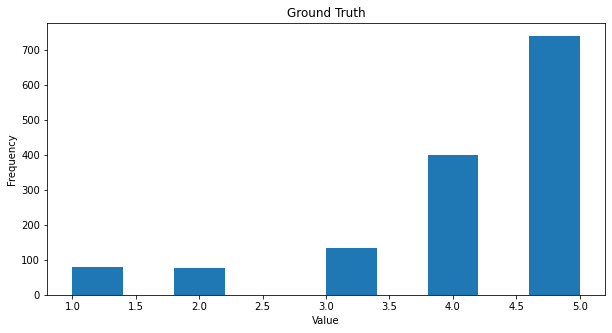

In [496]:
#what is the distrubution in ground truth scores like?
getHistogram(finaldf,'ratingScore', 'Ground Truth')

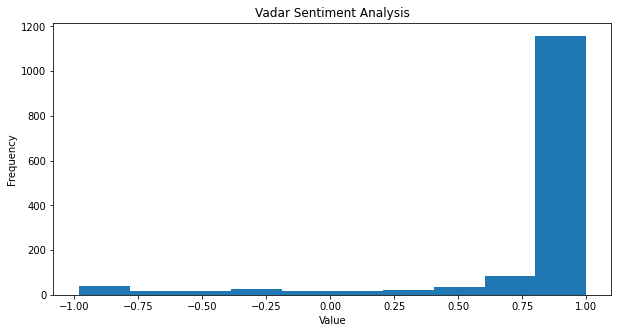

In [497]:
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

both are very left skewed, amount of postitive reviews are way much more than negative reviews



In [498]:
def number_reviews_per_hotel(df):
    fig = plt.figure()

    x = hotelNames
    tempDf = df[['hotelName','reviewCol']]
    tempDf.columns = ['hotelName','n_reviews']
    tempDf = tempDf.groupby('hotelName').agg({'n_reviews':'count'})
    y = tempDf['n_reviews']
    plt.bar(x, y)
    plt.legend(loc='upper right')
    plt.xlabel("Hotel name")
    plt.ylabel("number of reviews")
    return tempDf

No handles with labels found to put in legend.


,n_reviews
hotelName,
Best Western St. Catharines Hotel &amp; Conference Centre,331
Canadas Best Value Inn - St. Catharines,115
Capri Inn,255
Cedar Suite Bed &amp; Breakfast,106
Christine&#39;s Bed and Breakfast,18
Comfort Inn,75
Hampton Inn St Catharines Niagara,45
Harbour Heights Bed &amp; Breakfast,8
Holiday Inn Hotel &amp; Suites St. Catharines Conference Centre,195


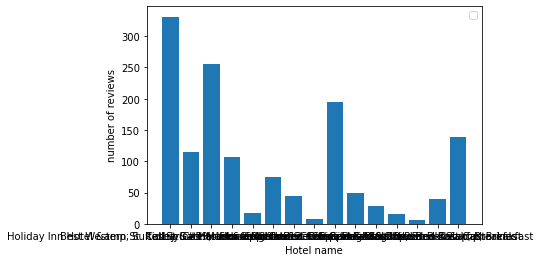

In [499]:
number_reviews_per_hotel(finaldf)

bed&breakfast tends to have less reviews

## BOX Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


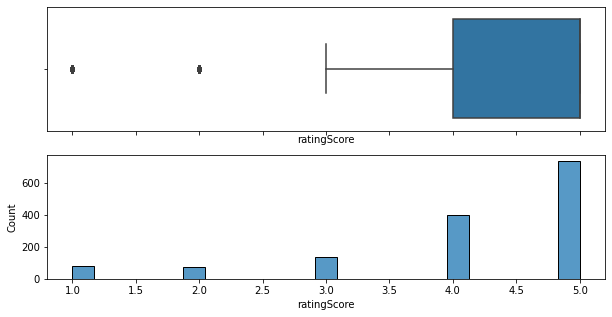

In [500]:
data = finaldf['ratingScore']

fig, ax = plt.subplots(2,1,figsize=(10,5),sharex=True)
sns.boxplot(data,ax=ax[0])
sns.histplot(data,ax=ax[1]);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


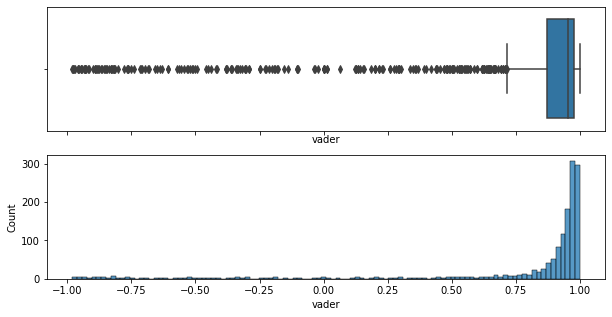

In [501]:
data = finaldf['vader']

fig, ax = plt.subplots(2,1,figsize=(10,5),sharex=True)
sns.boxplot(data,ax=ax[0])
sns.histplot(data,ax=ax[1]);

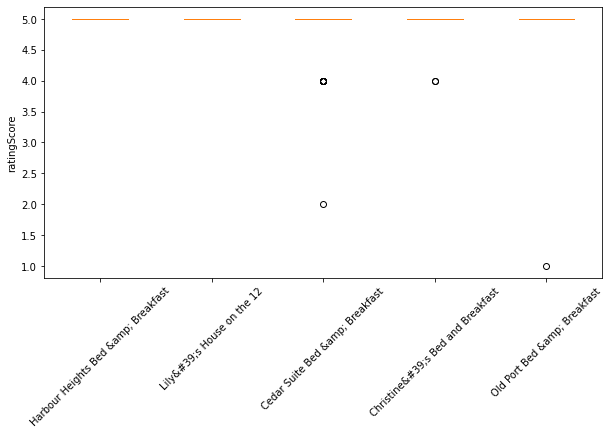

['Harbour Heights Bed &amp; Breakfast', 'Lily&#39;s House on the 12', 'Cedar Suite Bed &amp; Breakfast', 'Christine&#39;s Bed and Breakfast', 'Old Port Bed &amp; Breakfast']


In [502]:
five_hotels = avgRatingTop5
five_hotels = list(five_hotels['hotelName'])

# five_hotels = avg_rating_df[avg_rating_df['n_reviews'] > 10].sample(n=5,random_state=14)
# five_hotels = five_hotels.index.values

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('ratingScore')
plt.show()
print(five_hotels)

In [503]:
for H in hotel_list:
    print([H.mean(),H.var()])

[5.0, 0.0]
[5.0, 0.0]
[4.89622641509434, 0.1510332434860738]
[4.888888888888889, 0.10457516339869279]
[4.862068965517241, 0.5517241379310349]


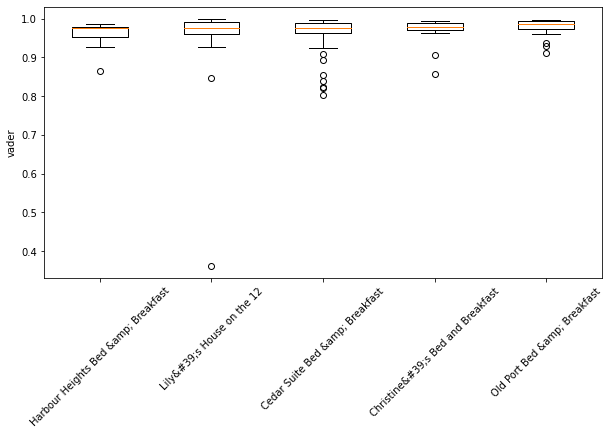

In [504]:
five_hotels = avgRatingTop5
five_hotels = list(five_hotels['hotelName'])


hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('vader')
plt.show()

In [505]:
for H in hotel_list:
    print([H.mean(),H.var()])

[0.9560875000000001, 0.0017089498214285723]
[0.9592780000000002, 0.00814611848571428]
[0.9659849056603771, 0.001335257484276729]
[0.970238888888889, 0.001201174281045752]
[0.978289655172414, 0.00044698881773399006]



Boxplot is more informative. The table only shows the means and variance. For the boxplot we can easily visualize the distribution of the data as well as it tells us the mean, max, min, 25 and 75 percentiles.

## Scatter&HeatMap

Text(0.5, 0, 'Vader Score')

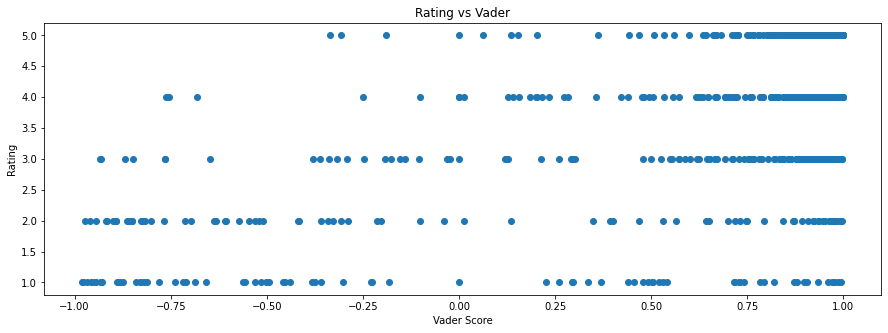

In [506]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax.plot(vader_scores, rating_scores,"o")
# ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax.set_title('Rating vs Vader')
# ax[1].set_title('Rating vs Vader - with alpha adjusted')


ax.set_ylabel('Rating')
ax.set_xlabel('Vader Score')

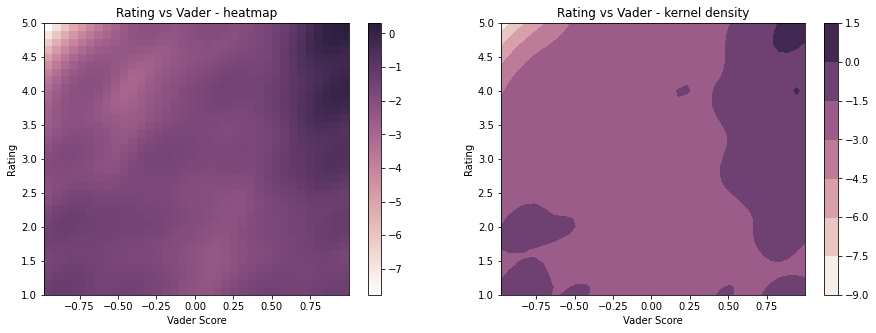

In [507]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density');

when rating is 5, the points are heavily distributed on the high vader section. with rating drops, the points are more widely distributed. 

In [508]:
review_len = np.array([len(x) for x in finaldf['reviewCol']])

In [509]:
def scatter(x,y,x_label,y_label):
    fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
    ax.plot(x, y,"o")
    # ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

    ax.set_title(x_label +' vs ' + y_label)
    # ax[1].set_title('Rating vs Vader - with alpha adjusted')

    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

In [510]:
def heatmap(x,y,x_label, y_label):
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


    b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
    b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y.min(), y.max())
    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim(y.min(), y.max())

    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)

    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)

    fig.colorbar(b1, ax=ax1)
    fig.colorbar(b2, ax=ax2)

    ax1.set_title(x_label +' vs ' + y_label)
    ax2.set_title(x_label +' vs ' + y_label + ' kernel density');

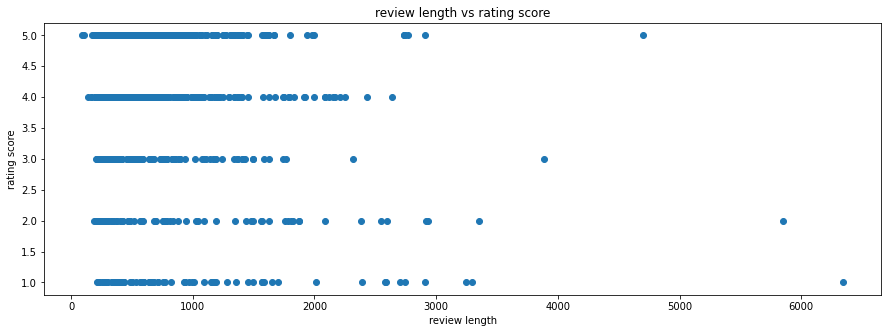

In [511]:
scatter(review_len,rating_scores,'review length','rating score')

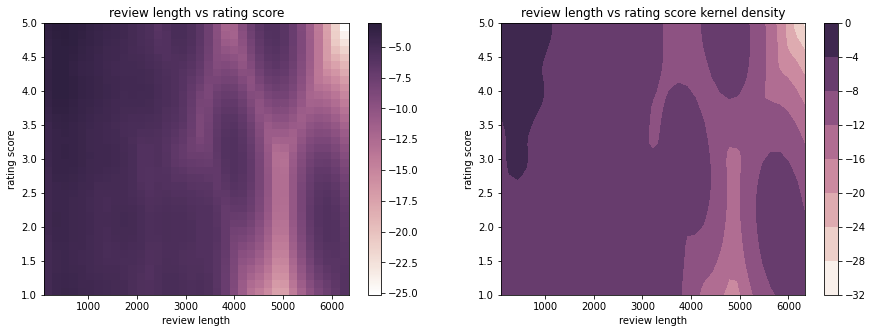

In [512]:
heatmap(review_len,rating_scores,x_label = 'review length',y_label = 'rating score')

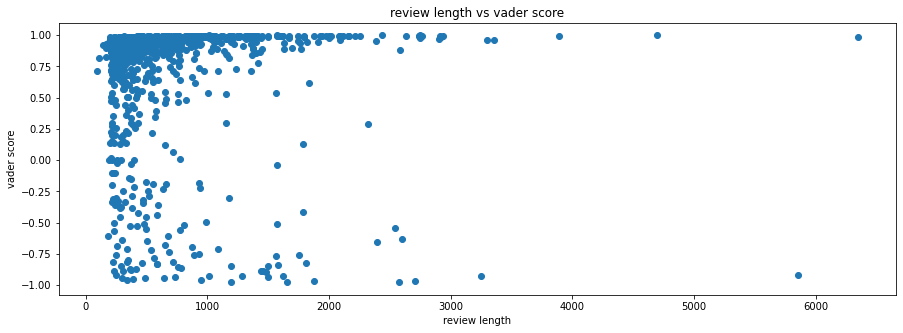

In [513]:
scatter(review_len,vader_scores,'review length','vader score')

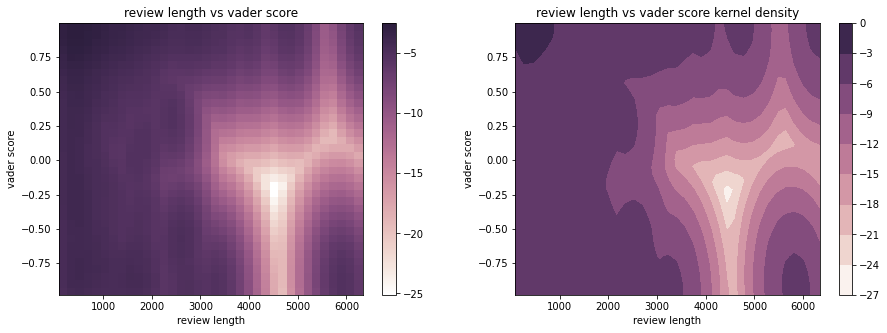

In [514]:
heatmap(review_len,vader_scores,x_label = 'review length',y_label = 'vader score')

Positive reviews are more likely to be short, long reviews are more likely to be negative.

In [515]:
number_reviws = avg_rating_df['n_reviews']
avg_ratingscore = avg_rating_df['AverageRatingScore']
avg_vaderscore = avg_rating_df['AverageVader']


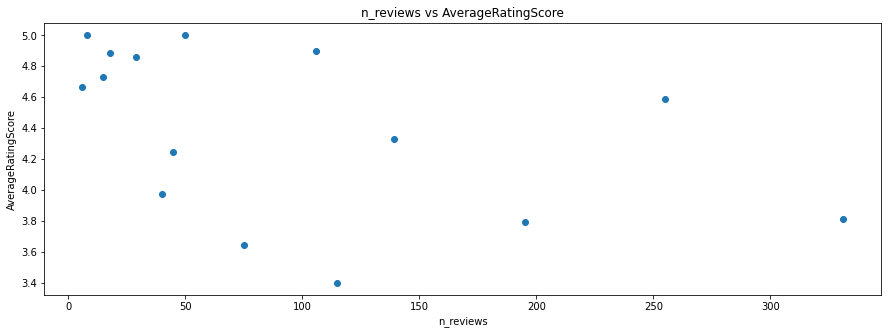

In [516]:
scatter(number_reviws,avg_ratingscore,'n_reviews','AverageRatingScore')

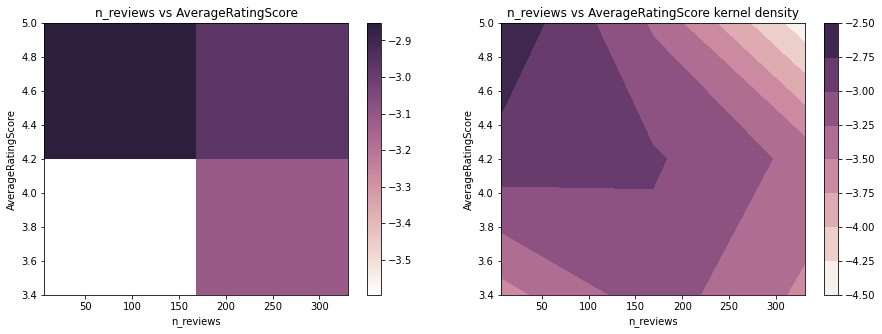

In [517]:
heatmap(number_reviws,avg_ratingscore,'n_reviews','AverageRatingScore')

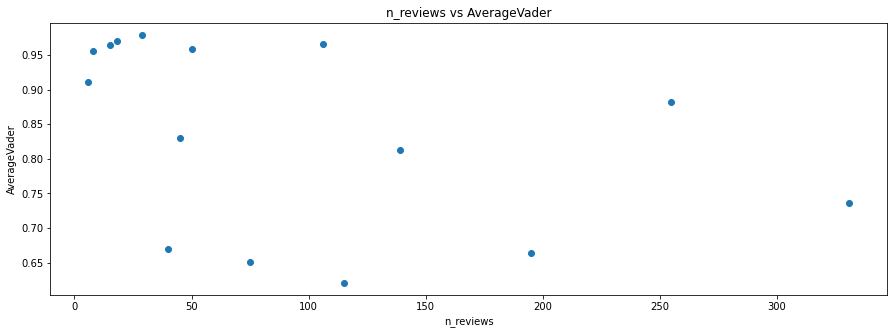

In [518]:
scatter(number_reviws,avg_vaderscore,'n_reviews','AverageVader')

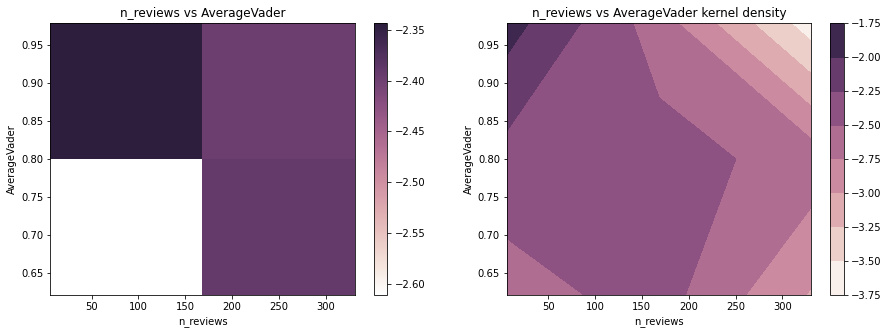

In [519]:
heatmap(number_reviws,avg_vaderscore,'n_reviews','AverageVader')

usually more number of reviews a hotel has, the rating score is lower than the ones who has less reviews

same for vader scores.

## Geo

In [520]:
def make_address(row):
  # individual columns need to be combined
  return row['streetAddress']+", "+row['City']+", "+row['Province']

In [521]:
geo_rating_df = avg_rating_df\
                         .join(hotelDf.groupby('hotelName')\
                         .agg({'streetAddress':'max','City':'max','Province':'max','postalCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
geo_rating_df.tail()

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address
hotelName,,,,,,,,
Old Port Bed &amp; Breakfast,0.978290,4.862069,29,73 Main St,St. Catharines,Ontario,L2N 4V1,"73 Main St, St. Catharines, Ontario"
Rheinhessen Estate Bed &amp; Breakfast,0.963847,4.733333,15,1108 Lakeshore Road West Fireline 600,St. Catharines,Ontario,L2R 6P9,"1108 Lakeshore Road West Fireline 600, St. Catharines, Ontario"
Ridley Gate Manor,0.911717,4.666667,6,37 Henrietta St,St. Catharines,Ontario,L2S 2M7,"37 Henrietta St, St. Catharines, Ontario"
Springbank House,0.670047,3.975000,40,68 Yates St,St. Catharines,Ontario,L2R 5R8,"68 Yates St, St. Catharines, Ontario"
Stone Mill Inn,0.812564,4.330935,139,271 Merritt St,St. Catharines,Ontario,L2T 1K1,"271 Merritt St, St. Catharines, Ontario"


In [522]:
# 0 - need to give the tool a generic name.
locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
Best Western St. Catharines Hotel &amp; Conference Centre,0.736876,3.812689,331,2 North Service Rd,St. Catharines,Ontario,L2N 4G9,"2 North Service Rd, St. Catharines, Ontario","(Best Western, 2, North Service Road, Henley, St. Catharines, Niagara Region, Golden Horseshoe, Ontario, L2N 4G9, Canada, (43.1780811, -79.25059650386288))","(43.1780811, -79.25059650386288, 0.0)",43.178081,-79.250597,0.0
Canadas Best Value Inn - St. Catharines,0.621343,3.400000,115,420 Ontario St Queen Elizabeth Hwy Exit 47,St. Catharines,Ontario,L2R 5M1,"420 Ontario St Queen Elizabeth Hwy Exit 47, St. Catharines, Ontario",None,None,NaN,NaN,NaN
Capri Inn,0.881913,4.588235,255,391 Ontario St,St. Catharines,Ontario,L2R 5L3,"391 Ontario St, St. Catharines, Ontario","(Capri Inn, 391, Ontario Street, Henley, St. Catharines, Niagara Region, Golden Horseshoe, Ontario, L2R 5L3, Canada, (43.177902950000004, -79.26727686930317))","(43.177902950000004, -79.26727686930317, 0.0)",43.177903,-79.267277,0.0
Cedar Suite Bed &amp; Breakfast,0.965985,4.896226,106,11 Dorothy St,St. Catharines,Ontario,L2N 4A4,"11 Dorothy St, St. Catharines, Ontario","(11, Dorothy Street, Henley, St. Catharines, Niagara Region, Golden Horseshoe, Ontario, L2R 5L3, Canada, (43.18094758125, -79.26601458124999))","(43.18094758125, -79.26601458124999, 0.0)",43.180948,-79.266015,0.0
Christine&#39;s Bed and Breakfast,0.970239,4.888889,18,13 Blue Spruce Crt,St. Catharines,Ontario,L2N 4E6,"13 Blue Spruce Crt, St. Catharines, Ontario","(Blue Spruce Court, Henley, St. Catharines, Niagara Region, Golden Horseshoe, Ontario, L2N 4H7, Canada, (43.1956985, -79.2569111))","(43.1956985, -79.2569111, 0.0)",43.195698,-79.256911,0.0


In [523]:
map1 = folium.Map(
    location=[43.0896,-79.0849], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=12,
)

geo_rating_df.dropna().apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], color='#d7191c').add_to(map1), axis=1)

map1


In [524]:

from IPython.display import Image
Image('St. Catharine.png')

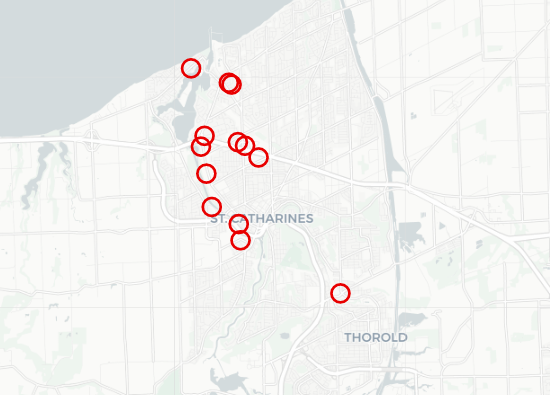

Temporal

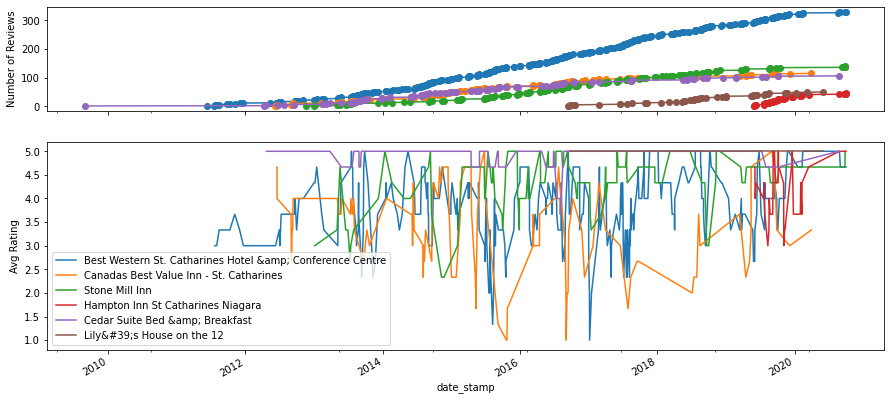

In [525]:
six_hotels = ['Best Western St. Catharines Hotel &amp; Conference Centre','Canadas Best Value Inn - St. Catharines',
              'Stone Mill Inn','Hampton Inn St Catharines Niagara','Cedar Suite Bed &amp; Breakfast','Lily&#39;s House on the 12']

fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

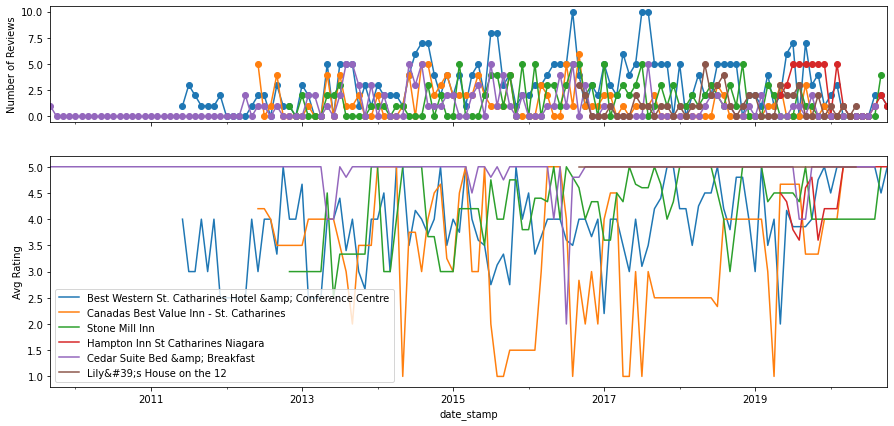

In [526]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()